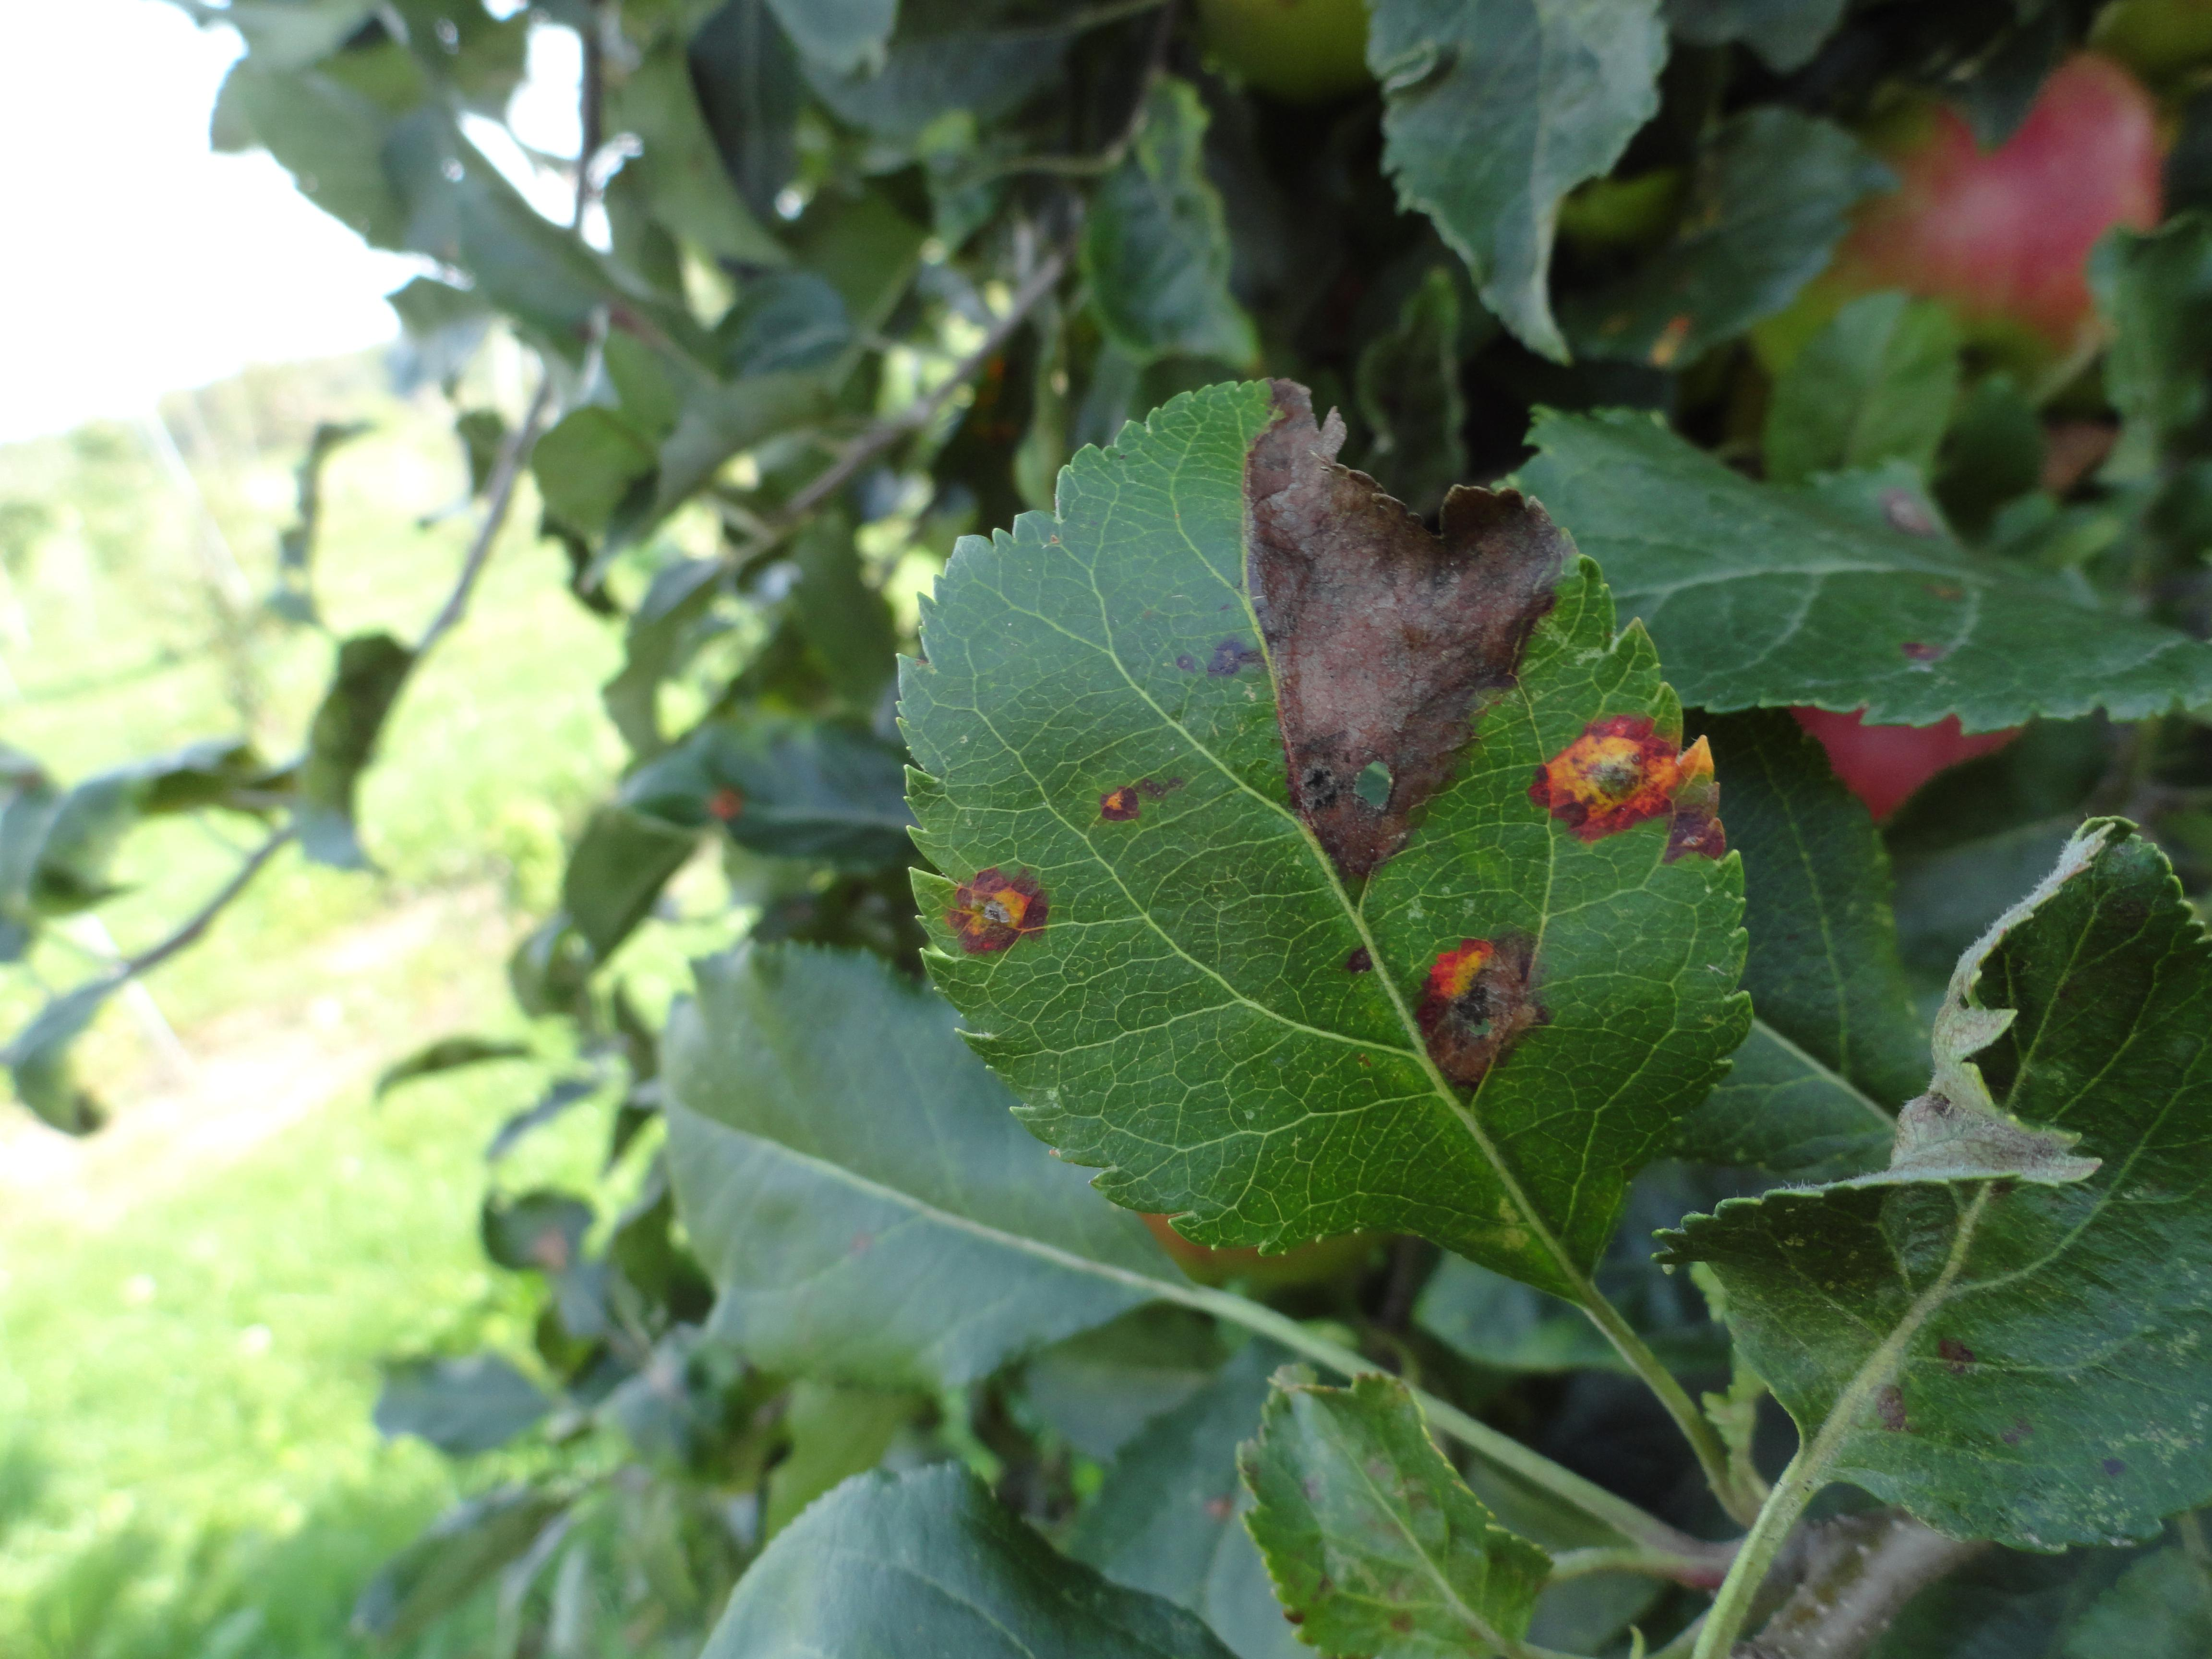

In [2]:
from PIL import Image
import IPython.display as d
image_path = r"C:\Users\HP\Downloads\vita\ML\AI\Plat_Disease_Prediction\Train\Rust\f8723f62139ac730.jpg"

with open(image_path,'rb') as f:
    d.display(d.Image(data=f.read(),width = 500))

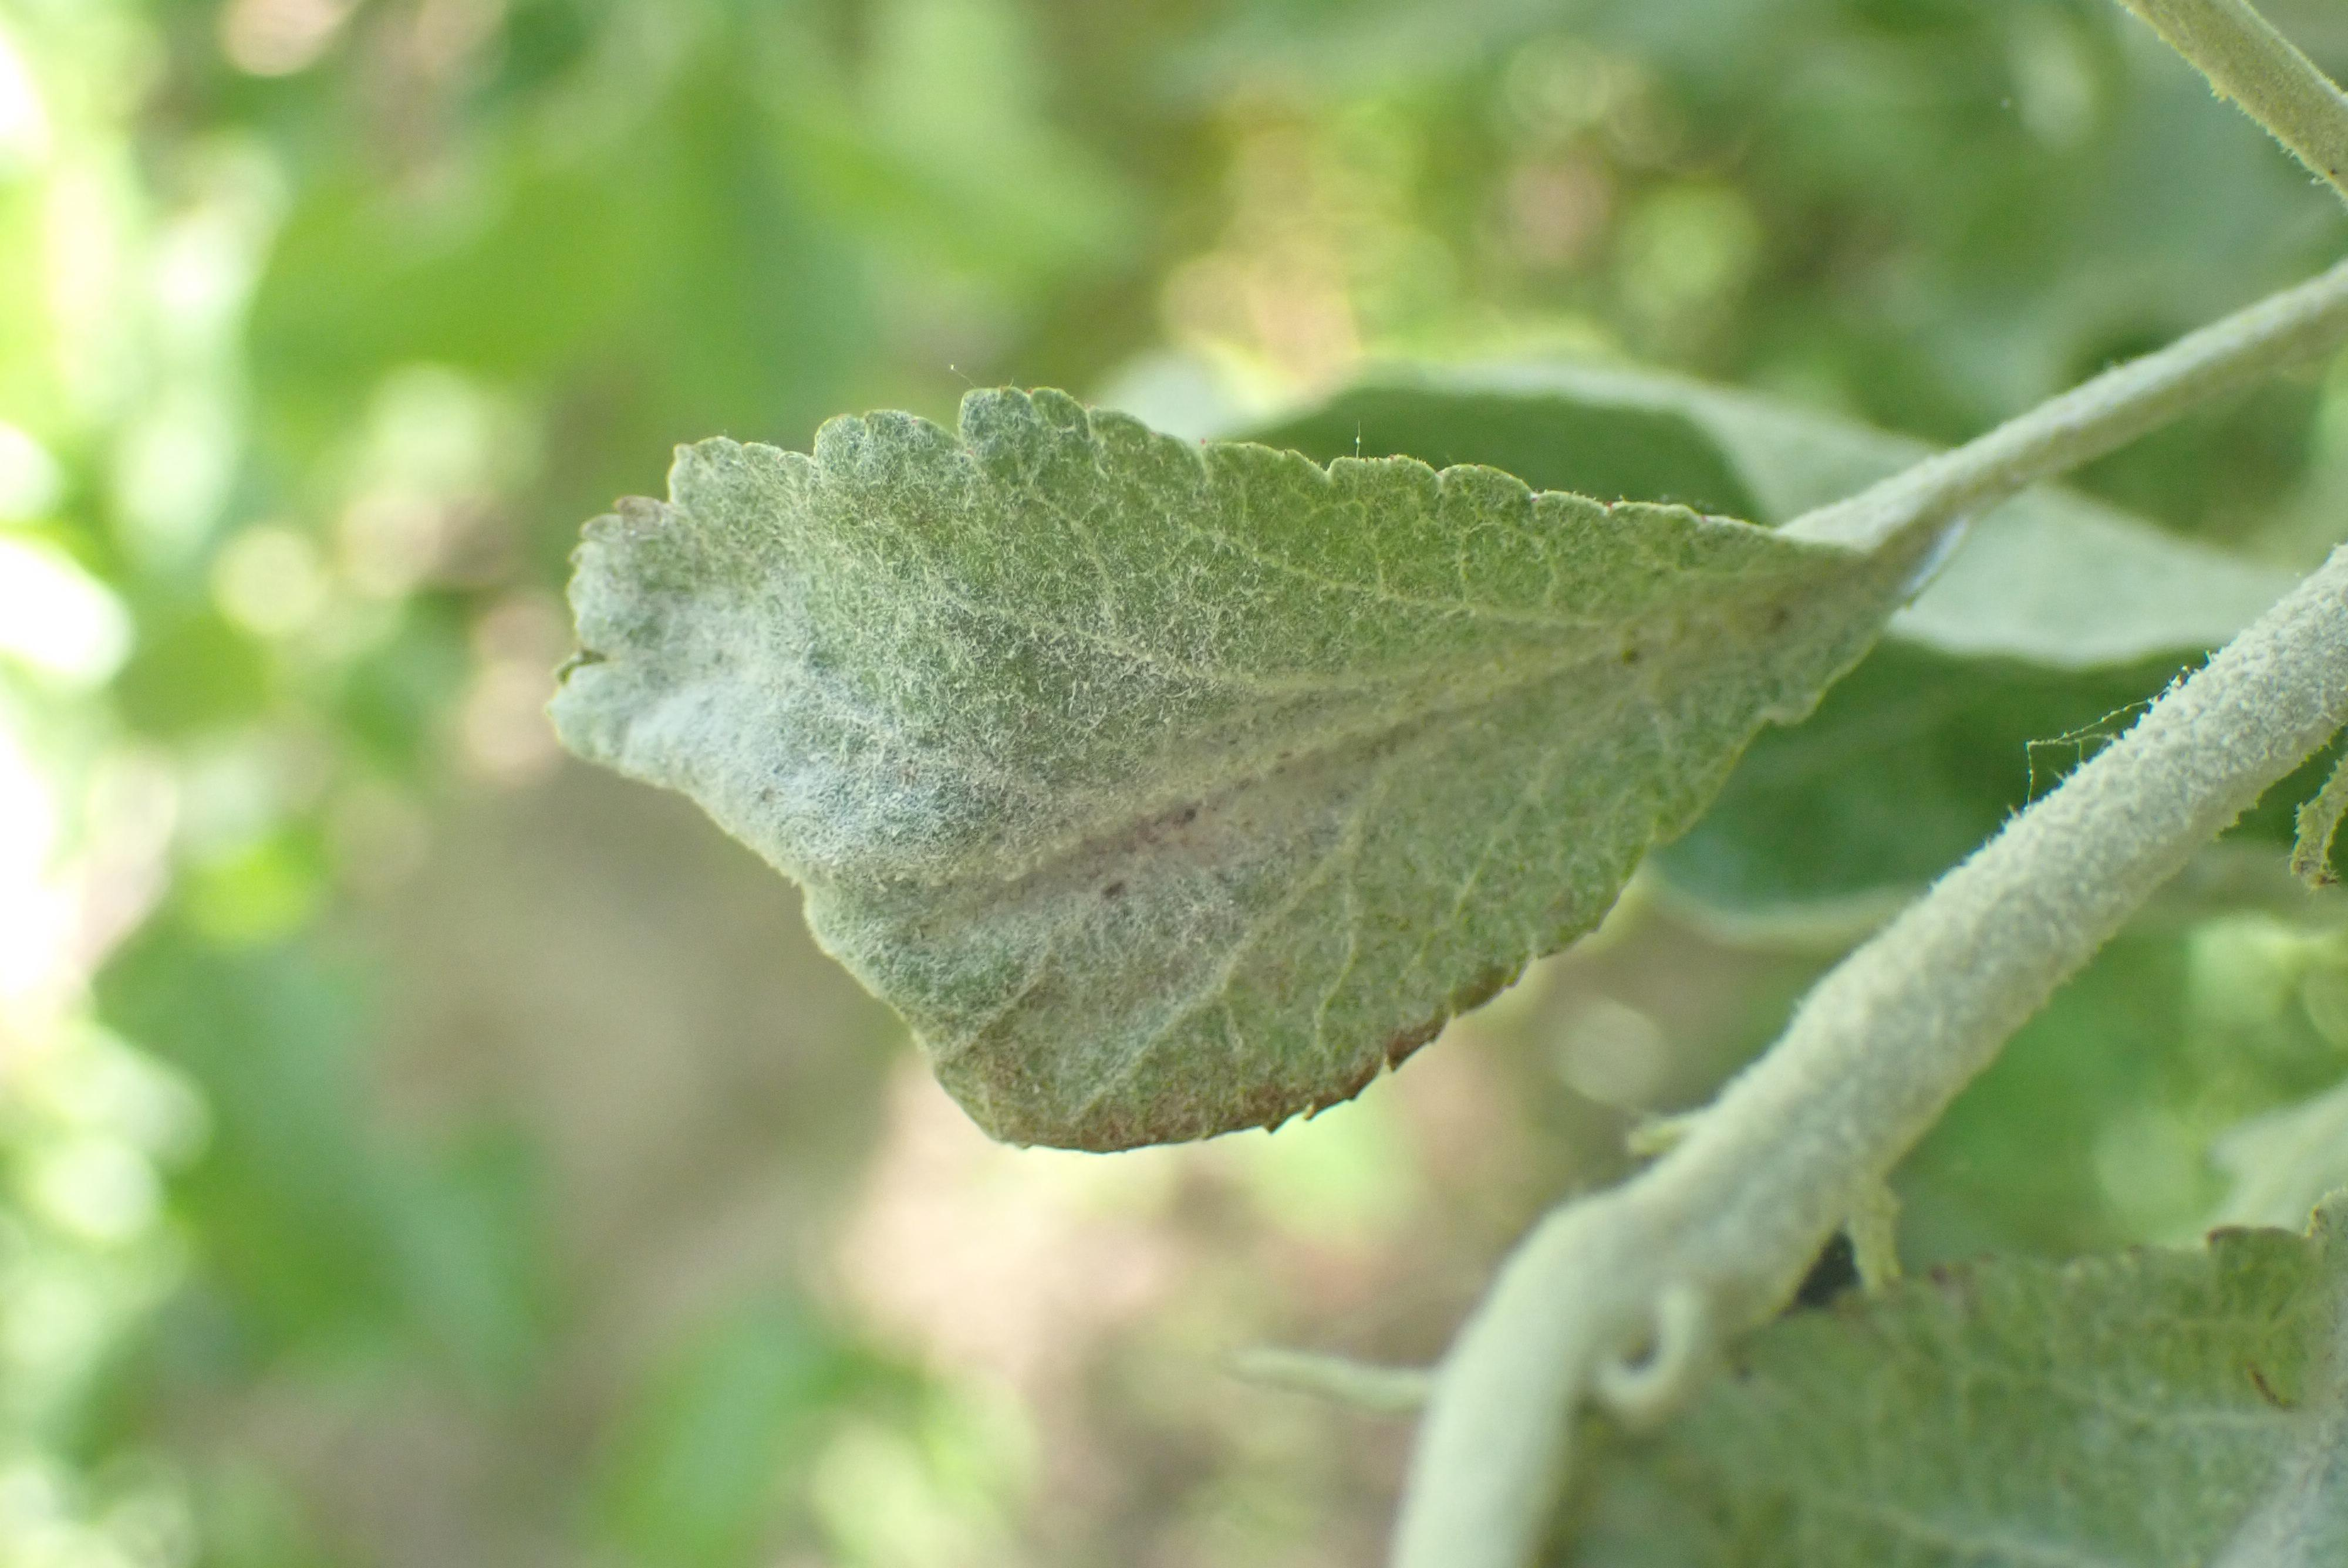

In [3]:
image_path = r"C:\Users\HP\Downloads\vita\ML\AI\Plat_Disease_Prediction\Train\Powdery\fff11a16638e2514.jpg"
with open(image_path,'rb') as f:
    d.display(d.Image(data = f.read(),width= 500))

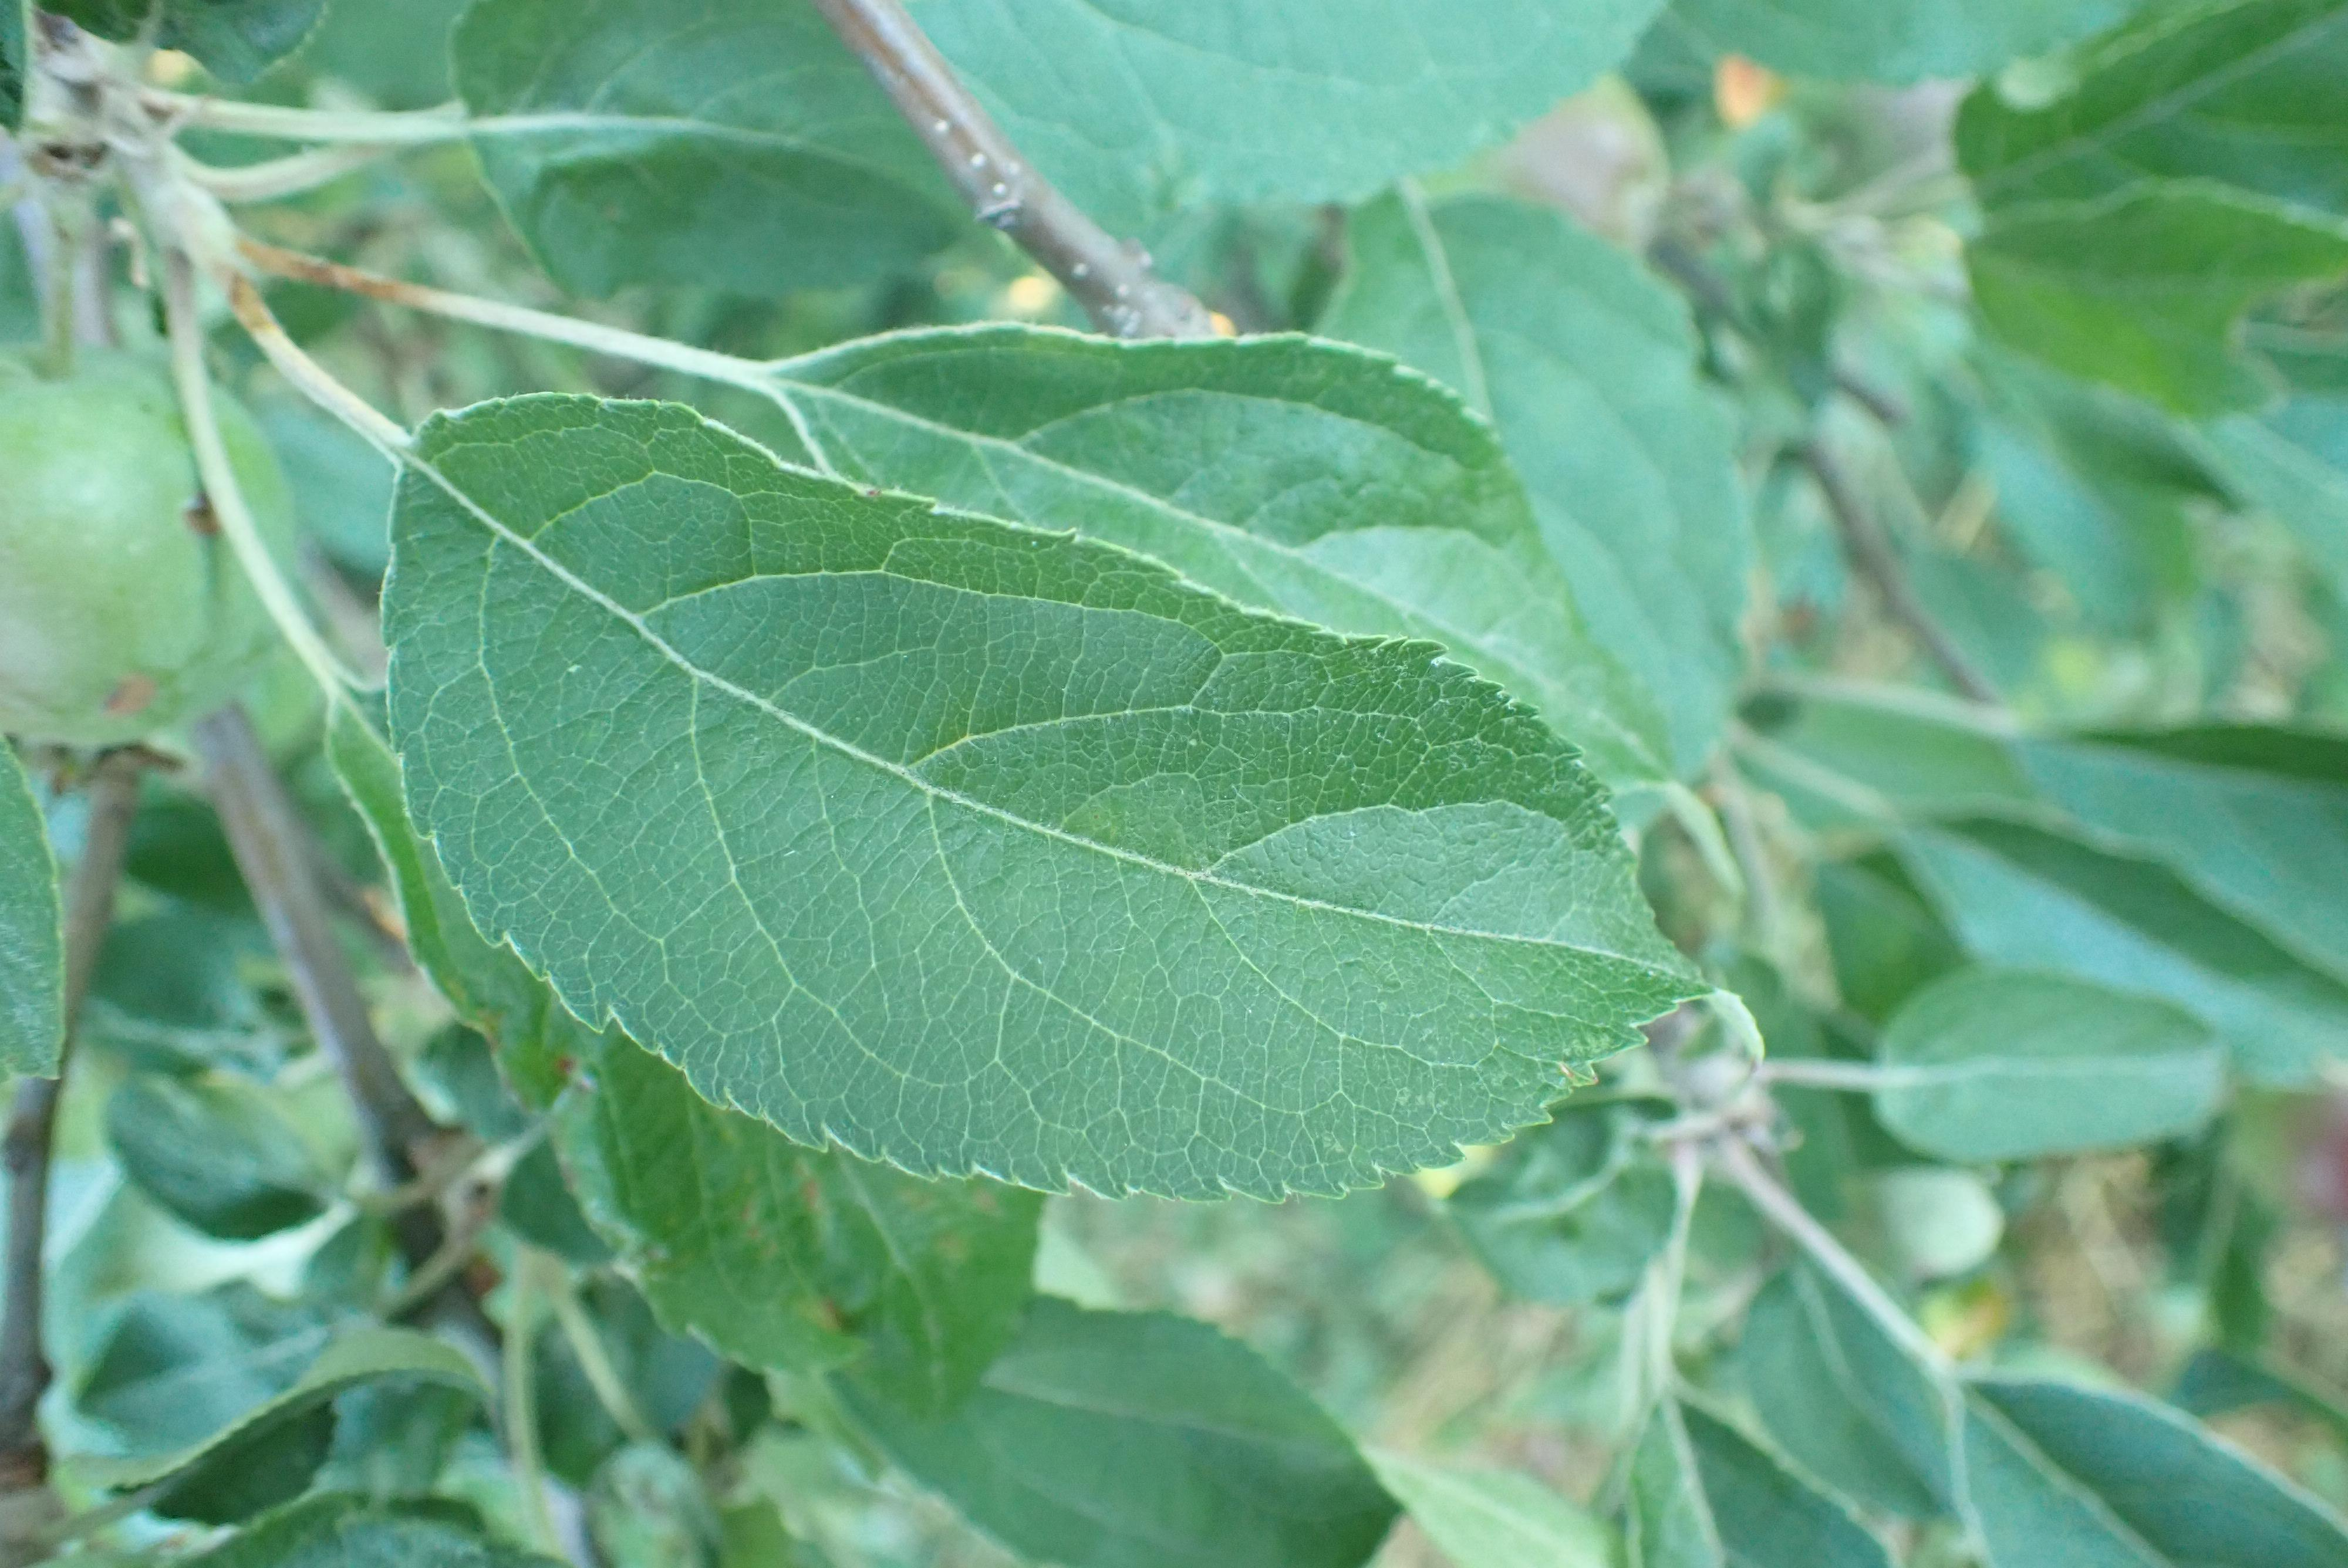

In [7]:
image_path = r"C:\Users\HP\Downloads\vita\ML\AI\Plat_Disease_Prediction\Train\Healthy\9edc590c03bd8b8b.jpg"
with open(image_path,'rb') as f:
    d.display(d.Image(data = f.read(),width= 500))

In [5]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [13]:
train_generator = train_datagen.flow_from_directory(r"C:\Users\HP\Downloads\vita\ML\AI\Plat_Disease_Prediction\Train",
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(r"C:\Users\HP\Downloads\vita\ML\AI\Plat_Disease_Prediction\Validation",
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

C:\Users\HP\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )

C:\Users\HP\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 211s 5s/step - accuracy: 0.4269 - loss: 3.6950 - val_accuracy: 0.6333 - val_loss: 0.8222
Epoch 2/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 196s 5s/step - accuracy: 0.7170 - loss: 0.6393 - val_accuracy: 0.7833 - val_loss: 0.5918
Epoch 3/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 1545s 38s/step - accuracy: 0.8306 - loss: 0.4223 - val_accuracy: 0.8167 - val_loss: 0.5768
Epoch 4/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 210s 5s/step - accuracy: 0.8907 - loss: 0.3099 - val_accuracy: 0.8333 - val_loss: 0.4475
Epoch 5/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 206s 5s/step - accuracy: 0.8851 - loss: 0.3015 - val_accuracy: 0.8333 - val_loss: 0.4724


In [21]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image(r"C:\Users\HP\Downloads\vita\ML\AI\Plat_Disease_Prediction\Test\Powdery\9ee39c2337175550.jpg")

In [22]:
predictions = model.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


array([0.0588963 , 0.9320859 , 0.00901784], dtype=float32)

In [23]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [24]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Powdery
